# Importações

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Ensaio - Descarga com chave

## Preparação dos dados

In [2]:
df_descarga_chave = pd.read_csv('./csv/ensaio_descarga_chave.csv', delimiter=';')

In [3]:
df_descarga_chave['V(V)'] = df_descarga_chave['V(V)'].apply(lambda x: x.replace(',', '.')).astype(float)
df_descarga_chave['I(A)'] = df_descarga_chave['I(A)'].apply(lambda x: x.replace(',', '.')).astype(float)
df_descarga_chave['t_total'] = df_descarga_chave['t_total'] * 60 # transformando coluna de minutos para segundos

In [4]:
df_descarga_chave['Potência(W)'] = df_descarga_chave['V(V)']*df_descarga_chave['I(A)']

In [5]:
energy_combined_2 = []
for i in range(0, len(df_descarga_chave)):
    energy_combined_2.append(np.trapz(y=df_descarga_chave['Potência(W)'][i:i+2], x=df_descarga_chave['t_total'][i:i+2]))
df_descarga_chave['Energia(J)'] = energy_combined_2

In [6]:
df_descarga_chave


,V(V),I(A),t_total,description,Potência(W),Energia(J)
0,4.163,0.00,0,Inicial,0.0000,0.000
1,4.010,1.00,0,Fechamento,4.0100,234.636
2,3.970,0.96,60,Descarga,3.8112,226.626
3,3.940,0.95,120,Descarga,3.7430,223.116
4,3.930,0.94,180,Descarga,3.6942,220.806
5,3.900,0.94,240,Descarga,3.6660,217.953
6,3.870,0.93,300,Descarga,3.5991,0.000
7,3.950,0.00,300,Abertura,0.0000,0.000
8,4.007,0.00,360,Regeneração,0.0000,0.000
9,4.014,0.00,420,Regeneração,0.0000,0.000


In [7]:
df_descarga_chave['Soma_Energias'] = 0

In [8]:
for i in range(1, len(df_descarga_chave['Energia(J)'])):
    df_descarga_chave['Soma_Energias'][i] = df_descarga_chave['Energia(J)'][i] + df_descarga_chave['Soma_Energias'][i-1]

C:\Users\bruno\AppData\Local\Temp\ipykernel_20676\4092581053.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descarga_chave['Soma_Energias'][i] = df_descarga_chave['Energia(J)'][i] + df_descarga_chave['Soma_Energias'][i-1]
C:\Users\bruno\AppData\Local\Temp\ipykernel_20676\4092581053.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '234.63599999999997' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_descarga_chave['Soma_Energias'][i] = df_descarga_chave['Energia(J)'][i] + df_descarga_chave['Soma_Energias'][i-1]


In [9]:
df_descarga_chave.head()

,V(V),I(A),t_total,description,Potência(W),Energia(J),Soma_Energias
0,4.163,0.00,0,Inicial,0.0000,0.000,0.000
1,4.010,1.00,0,Fechamento,4.0100,234.636,234.636
2,3.970,0.96,60,Descarga,3.8112,226.626,461.262
3,3.940,0.95,120,Descarga,3.7430,223.116,684.378
4,3.930,0.94,180,Descarga,3.6942,220.806,905.184


## Análises

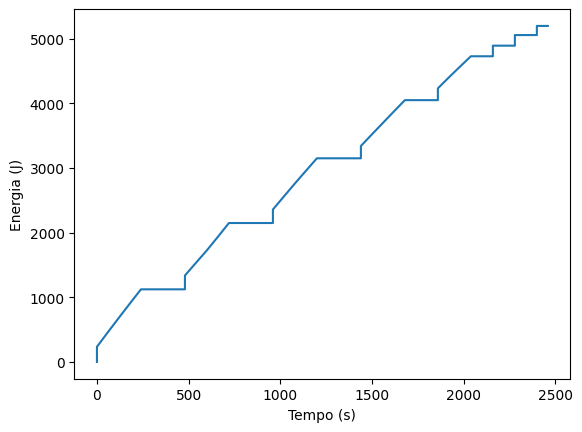

In [10]:
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['Soma_Energias'])
plt.xlabel('Tempo (s)')
plt.ylabel('Energia (J)')

plt.show()

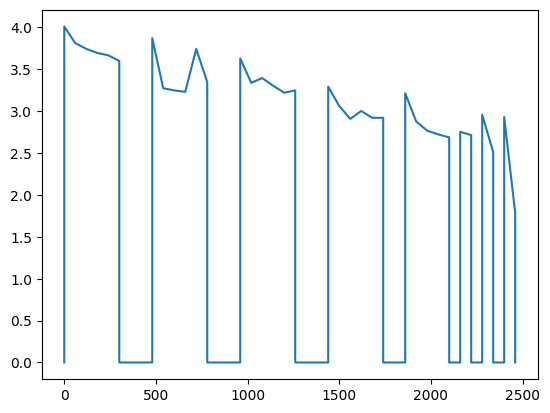

In [11]:
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['Potência(W)'])
plt.show()

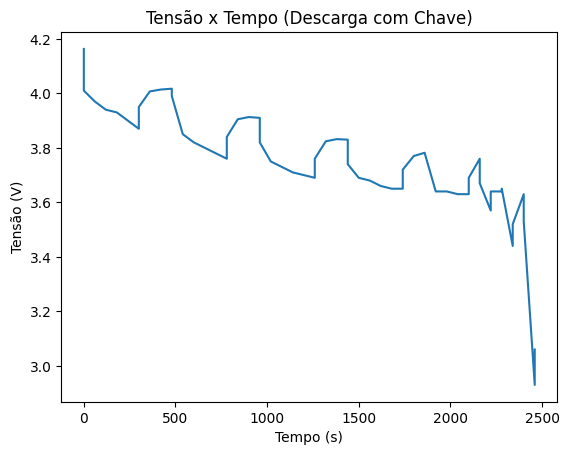

In [12]:
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['V(V)'])
plt.xlabel('Tempo (s)')
plt.ylabel('Tensão (V)')
plt.title('Tensão x Tempo (Descarga com Chave)')
plt.show()

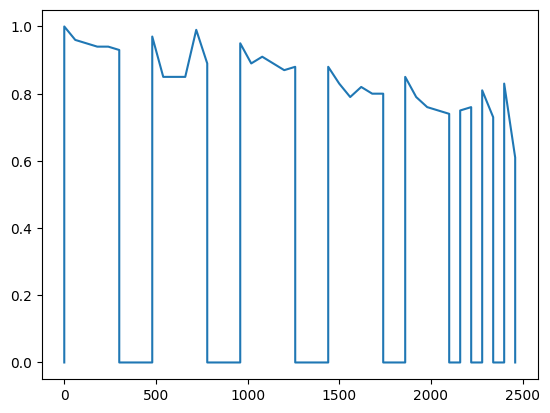

In [13]:
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['I(A)'])
plt.show()

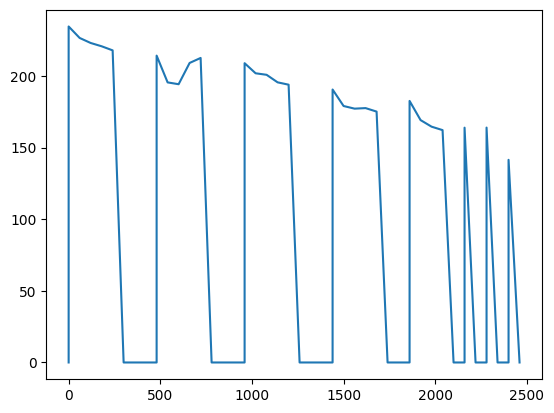

In [14]:
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['Energia(J)'])
plt.show()

In [15]:
df_descarga_chave['Energia(J)'].sum() # por que a energia deu tão baixa em comparação com os ensaios do Cristian?

5198.754

In [16]:
total_capacity_with_nominal_voltage = ((df_descarga_chave['Energia(J)'].sum() / 3600) / 3.7) * 10**3 # Não posso considerar 3,7. Voltar para a técnica de antes.
total_capacity_with_nominal_voltage

390.2968468468468

In [17]:
total_capacity = []
for i in range(0, len(list(df_descarga_chave['t_total']))-1):
    capacity = np.trapz(y=df_descarga_chave['I(A)'][i:i+2]*1000, x=df_descarga_chave['t_total'][i:i+2]/3600)
    total_capacity.append(capacity)

sum(total_capacity)

385.3333333333334

In [18]:
estimated_nominal_voltage_descarga = ((df_descarga_chave['Energia(J)'] / 3600).sum()) / (sum(total_capacity) * 1e-3) # divisão por 3600, conversão de J para wh

In [19]:
estimated_nominal_voltage_descarga

3.747660034602075

### Cálculo da Resistência Interna

In [20]:
# Encontre as linhas com status "Abertura"
abertura_df = df_descarga_chave[df_descarga_chave['description'] == 'Abertura']

# Loop para calcular resistência
voltage_list = []
current_list = []
resistance_list = []
df_internal_resistance = pd.DataFrame()

df_internal_resistance_dict = {'voltage': [voltage_list], 'current': [current_list], 'resistance': [resistance_list]}
for i in range(1, len(abertura_df)):
    index_abertura = abertura_df.index[i]
    voltage = abertura_df.iloc[i]['V(V)'] - df_descarga_chave.at[index_abertura - 1, 'V(V)']
    current = df_descarga_chave.at[index_abertura - 1, 'I(A)']

    # Verifique se a corrente não é zero antes de calcular a resistência
    if current != 0:
        resist = abs(voltage / current)
        
        print(f"Resistência {i}: {resist}")

        df_internal_resistance_dict['voltage'].append(voltage)
        df_internal_resistance_dict['current'].append(current)
        df_internal_resistance_dict['resistance'].append(resist)
        
    else:
        print(f"Resistência {i}: Corrente é zero, não é possível calcular a resistência.")

Resistência 1: 0.08988764044943828
Resistência 2: 0.07954545454545436
Resistência 3: 0.08750000000000036
Resistência 4: 0.08108108108108115
Resistência 5: 0.0921052631578951
Resistência 6: 0.10958904109589052
Resistência 7: 0.21311475409836048


In [21]:
df_internal_resistance_dict = pd.DataFrame(df_internal_resistance_dict).tail(-1)

In [22]:
df_internal_resistance_dict

,voltage,current,resistance
1,0.08,0.89,0.089888
2,0.07,0.88,0.079545
3,0.07,0.8,0.0875
4,0.06,0.74,0.081081
5,0.07,0.76,0.092105
6,0.08,0.73,0.109589
7,0.13,0.61,0.213115


In [134]:
internal_resistance_chave = sum(df_internal_resistance_dict['resistance'][0:4]) / len(df_internal_resistance_dict['resistance'][0:4])
internal_resistance_chave

0.08450354401899354

In [24]:
df_internal_resistance_dict['timestamp'] = [13, 21, 29, 35, 37, 39, 41] # tirei o 5, pois mudei o Abertura que estava em 5 para Fechamento, que é o correto

In [25]:
df_internal_resistance_dict

,voltage,current,resistance,timestamp
1,0.08,0.89,0.089888,13
2,0.07,0.88,0.079545,21
3,0.07,0.8,0.0875,29
4,0.06,0.74,0.081081,35
5,0.07,0.76,0.092105,37
6,0.08,0.73,0.109589,39
7,0.13,0.61,0.213115,41


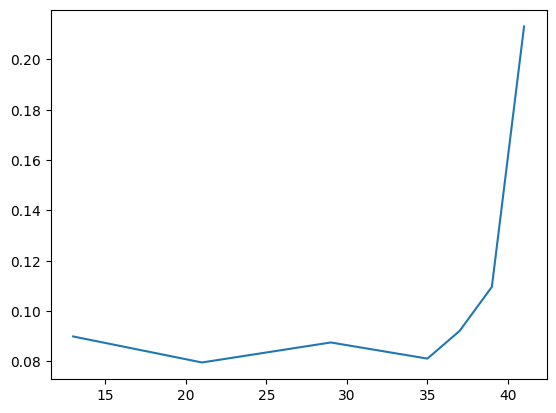

In [26]:
plt.plot(df_internal_resistance_dict['timestamp'], df_internal_resistance_dict['resistance'])
plt.show()

In [27]:
df_internal_resistance_dict

,voltage,current,resistance,timestamp
1,0.08,0.89,0.089888,13
2,0.07,0.88,0.079545,21
3,0.07,0.8,0.0875,29
4,0.06,0.74,0.081081,35
5,0.07,0.76,0.092105,37
6,0.08,0.73,0.109589,39
7,0.13,0.61,0.213115,41


In [28]:
df_internal_resistance_dict['soma_resistances'] = 0
for i in range(2, len(df_internal_resistance_dict['resistance'])):
    df_internal_resistance_dict['soma_resistances'][i] = df_internal_resistance_dict['resistance'][i] + df_internal_resistance_dict['soma_resistances'][i-1]

C:\Users\bruno\AppData\Local\Temp\ipykernel_20676\3152452664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internal_resistance_dict['soma_resistances'][i] = df_internal_resistance_dict['resistance'][i] + df_internal_resistance_dict['soma_resistances'][i-1]
C:\Users\bruno\AppData\Local\Temp\ipykernel_20676\3152452664.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.07954545454545436' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_internal_resistance_dict['soma_resistances'][i] = df_internal_resistance_dict['resistance'][i] + df_internal_resistance_dict['soma_resistances'][i-1]


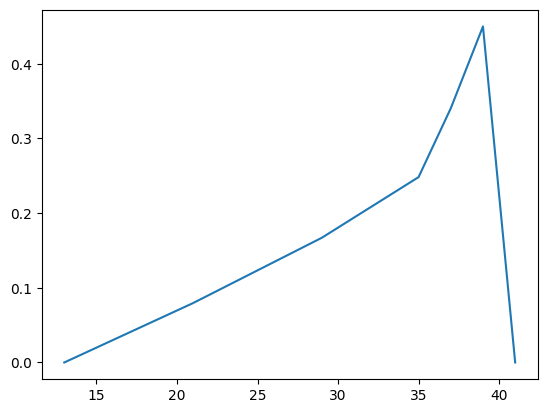

In [29]:
plt.plot(df_internal_resistance_dict['timestamp'], df_internal_resistance_dict['soma_resistances']) # Teste
plt.show()

In [30]:
df_internal_resistance_dict

,voltage,current,resistance,timestamp,soma_resistances
1,0.08,0.89,0.089888,13,0.000000
2,0.07,0.88,0.079545,21,0.079545
3,0.07,0.8,0.0875,29,0.167045
4,0.06,0.74,0.081081,35,0.248127
5,0.07,0.76,0.092105,37,0.340232
6,0.08,0.73,0.109589,39,0.449821
7,0.13,0.61,0.213115,41,0.000000


In [31]:
df_internal_resistance_dict['Potência(W)'] = ((df_internal_resistance_dict['current'])**2)*(df_internal_resistance_dict['resistance'])

In [32]:
df_internal_resistance_dict

,voltage,current,resistance,timestamp,soma_resistances,Potência(W)
1,0.08,0.89,0.089888,13,0.000000,0.0712
2,0.07,0.88,0.079545,21,0.079545,0.0616
3,0.07,0.8,0.0875,29,0.167045,0.056
4,0.06,0.74,0.081081,35,0.248127,0.0444
5,0.07,0.76,0.092105,37,0.340232,0.0532
6,0.08,0.73,0.109589,39,0.449821,0.0584
7,0.13,0.61,0.213115,41,0.000000,0.0793


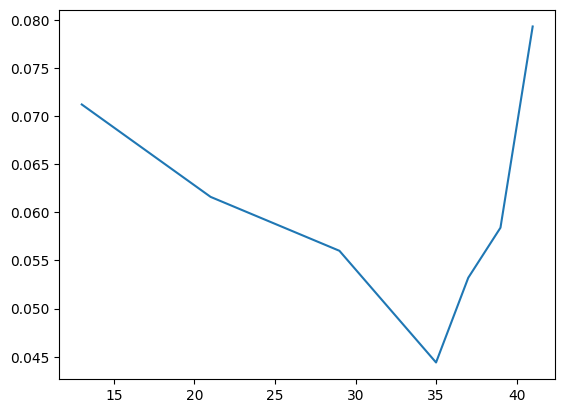

In [33]:
plt.plot(df_internal_resistance_dict['timestamp'], df_internal_resistance_dict['Potência(W)'])
plt.show()

# Ensaio Carga

## Preparação dos dados

In [34]:
df_carga = pd.read_csv('./csv/ensaio_carga.csv', delimiter=';')

In [35]:
df_carga[['t min', 'I(A)', 'V(V)', 'P(w)', 'E(J)']] = df_carga[['t min', 'I(A)', 'V(V)', 'P(w)', 'E(J)']].replace(',', '.', regex=True).astype(float)

In [36]:
df_carga.head()

,t soma,t min,I(A),V(V),P(w),E(J)
0,0,0.000000,0.0000,3.164,0.000000,0.000000
1,22,0.366667,0.0003,3.165,0.000950,0.010445
2,32,0.533333,0.0944,3.193,0.301419,1.511843
3,36,0.600000,0.0931,3.197,0.297641,1.198120
4,37,0.616667,0.4750,3.273,1.554675,0.926158


In [37]:
df_carga['Soma_Energias'] = 0

In [38]:
for i in range(1, len(df_carga['E(J)'])):
    df_carga['Soma_Energias'][i] = df_carga['E(J)'][i] + df_carga['Soma_Energias'][i-1]

C:\Users\bruno\AppData\Local\Temp\ipykernel_20676\1032561156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_carga['Soma_Energias'][i] = df_carga['E(J)'][i] + df_carga['Soma_Energias'][i-1]
C:\Users\bruno\AppData\Local\Temp\ipykernel_20676\1032561156.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.0104445' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_carga['Soma_Energias'][i] = df_carga['E(J)'][i] + df_carga['Soma_Energias'][i-1]


## Análises

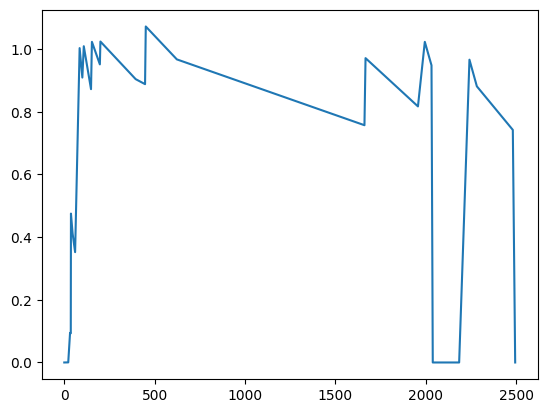

In [39]:
plt.plot(df_carga['t soma'], df_carga['I(A)'])

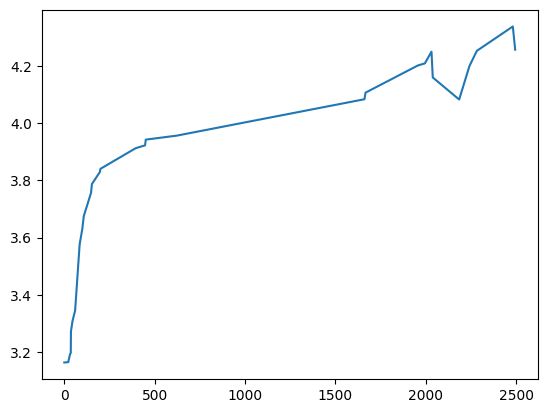

In [40]:
plt.plot(df_carga['t soma'], df_carga['V(V)'])

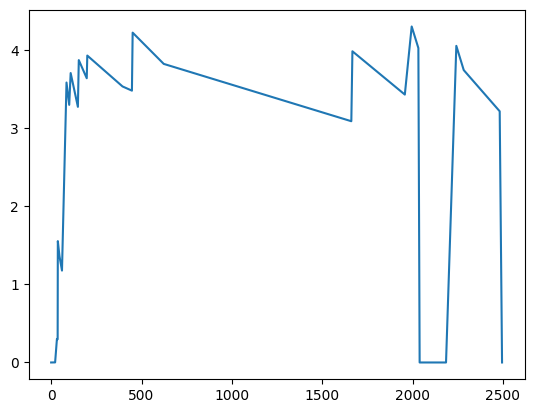

In [41]:
plt.plot(df_carga['t soma'], df_carga['P(w)'])

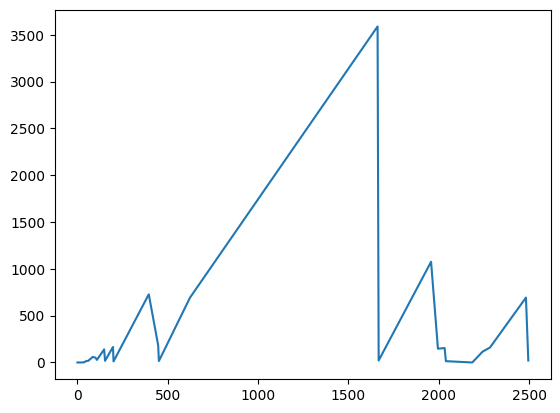

In [42]:
plt.plot(df_carga['t soma'], df_carga['E(J)'])
plt.show()

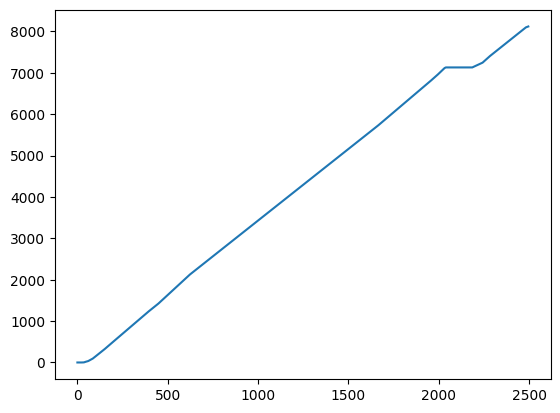

In [43]:
plt.plot(df_carga['t soma'], df_carga['Soma_Energias'])
plt.show()

In [44]:
df_carga.head()

,t soma,t min,I(A),V(V),P(w),E(J),Soma_Energias
0,0,0.000000,0.0000,3.164,0.000000,0.000000,0.000000
1,22,0.366667,0.0003,3.165,0.000950,0.010445,0.010445
2,32,0.533333,0.0944,3.193,0.301419,1.511843,1.522288
3,36,0.600000,0.0931,3.197,0.297641,1.198120,2.720408
4,37,0.616667,0.4750,3.273,1.554675,0.926158,3.646566


In [45]:
df_carga['E(J)'].sum()

8117.773422650001

In [46]:
total_capacity_carga_with_nominal_voltage = ((df_carga['E(J)'].sum() / 3600) / 3.7) * (10**3)
total_capacity_carga_with_nominal_voltage

609.442449147898

In [47]:
total_capacity_carga = []
for i in range(0, len(list(df_carga['t soma']))):
    capacity = np.trapz(y=df_carga['I(A)'][i:i+2]*1000, x=df_carga['t soma'][i:i+2]/3600)
    total_capacity_carga.append(capacity)

sum(total_capacity_carga)

560.4628750000002

In [48]:
estimated_nominal_voltage_carga = ((df_carga['E(J)'] / 3600).sum()) / (sum(total_capacity_carga) * 1e-3)

In [49]:
estimated_nominal_voltage_carga

4.023347776330808

In [50]:
df_carga['E(J)'].sum()

8117.773422650001

In [51]:
(df_carga['E(J)'].sum() / 3600) / 3.7

0.6094424491478979

In [52]:
df_carga

,t soma,t min,I(A),V(V),P(w),E(J),Soma_Energias
0,0,0.000000,0.0000,3.164,0.000000,0.000000,0.000000
1,22,0.366667,0.0003,3.165,0.000950,0.010445,0.010445
2,32,0.533333,0.0944,3.193,0.301419,1.511843,1.522288
3,36,0.600000,0.0931,3.197,0.297641,1.198120,2.720408
4,37,0.616667,0.4750,3.273,1.554675,0.926158,3.646566
5,46,0.766667,0.4120,3.310,1.363720,13.132777,16.779343
6,60,1.000000,0.3520,3.345,1.177440,17.788120,34.567463
7,85,1.416667,1.0030,3.576,3.586728,59.552100,94.119563
8,100,1.666667,0.9090,3.631,3.300579,51.654803,145.774366
9,108,1.800000,1.0090,3.675,3.708075,28.034616,173.808982


In [53]:
resistance_of_load_carga = (estimated_nominal_voltage_carga**2 * 2495) / df_carga['E(J)'].sum() # errado

In [54]:
resistance_of_load_carga

4.975179717868301

In [55]:
df_carga

,t soma,t min,I(A),V(V),P(w),E(J),Soma_Energias
0,0,0.000000,0.0000,3.164,0.000000,0.000000,0.000000
1,22,0.366667,0.0003,3.165,0.000950,0.010445,0.010445
2,32,0.533333,0.0944,3.193,0.301419,1.511843,1.522288
3,36,0.600000,0.0931,3.197,0.297641,1.198120,2.720408
4,37,0.616667,0.4750,3.273,1.554675,0.926158,3.646566
5,46,0.766667,0.4120,3.310,1.363720,13.132777,16.779343
6,60,1.000000,0.3520,3.345,1.177440,17.788120,34.567463
7,85,1.416667,1.0030,3.576,3.586728,59.552100,94.119563
8,100,1.666667,0.9090,3.631,3.300579,51.654803,145.774366
9,108,1.800000,1.0090,3.675,3.708075,28.034616,173.808982


In [56]:
abertura_df_carga = df_carga[df_carga['I(A)'] == 0]

# Loop para calcular resistência
voltage_list = []
current_list = []
resistance_list = []
df_internal_resistance_dict_carga = pd.DataFrame()

df_internal_resistance_dict_carga = {'voltage': [voltage_list], 'current': [current_list], 'resistance': [resistance_list]}
for i in range(1, len(abertura_df_carga)):
    index_abertura = abertura_df_carga.index[i]
    voltage = abertura_df_carga.iloc[i]['V(V)'] - df_carga.at[index_abertura - 1, 'V(V)']
    current = df_carga.at[index_abertura - 1, 'I(A)']

    # Verifique se a corrente não é zero antes de calcular a resistência
    if current != 0:
        resist = abs(voltage / current)
        
        print(f"Resistência {i}: {resist}")

        df_internal_resistance_dict_carga['voltage'].append(voltage)
        df_internal_resistance_dict_carga['current'].append(current)
        df_internal_resistance_dict_carga['resistance'].append(resist)
        
    else:
        print(f"Resistência {i}: Corrente é zero, não é possível calcular a resistência.")

Resistência 1: 0.09493670886075935
Resistência 2: Corrente é zero, não é possível calcular a resistência.
Resistência 3: 0.10916442048517455


In [57]:
sum(df_internal_resistance_dict_carga['resistance'][1:]) / len(df_internal_resistance_dict_carga['resistance'][1:])

0.10205056467296694

# Ensaio Descarga

In [58]:
df_descarga = pd.read_csv('./csv/ensaio_descarga.csv', delimiter=';')

In [59]:
df_descarga[['t min arred', 't s', 't soma', 't min', 'I(A)', 'V(V)', 'P(w)','E(J)']] = df_descarga[['t min arred', 't s', 't soma', 't min', 'I(A)', 'V(V)', 'P(w)','E(J)']].replace(',', '.', regex=True).astype(float)

In [60]:
df_descarga['Soma_Energias'] = 0

In [61]:
for i in range(1, len(df_descarga['E(J)'])):
    df_descarga['Soma_Energias'][i] = df_descarga['E(J)'][i] + df_descarga['Soma_Energias'][i-1]

C:\Users\bruno\AppData\Local\Temp\ipykernel_20676\4115077364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descarga['Soma_Energias'][i] = df_descarga['E(J)'][i] + df_descarga['Soma_Energias'][i-1]
C:\Users\bruno\AppData\Local\Temp\ipykernel_20676\4115077364.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '16.648335' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_descarga['Soma_Energias'][i] = df_descarga['E(J)'][i] + df_descarga['Soma_Energias'][i-1]


In [62]:
df_descarga.head()

,t min arred,t s,t soma,t min,I(A),V(V),P(w),E(J),Soma_Energias
0,0.0,0.0,0.0,0.00,0.000,4.18,0.00000,0.000000,0.000000
1,0.0,9.0,9.0,0.15,0.909,4.07,3.69963,16.648335,16.648335
2,1.0,30.0,90.0,1.50,0.860,4.00,3.44000,289.155015,305.803350
3,2.0,30.0,150.0,2.50,0.855,3.97,3.39435,205.030500,510.833850
4,12.0,30.0,750.0,12.50,0.742,3.78,2.80476,1859.733000,2370.566850


## Análises

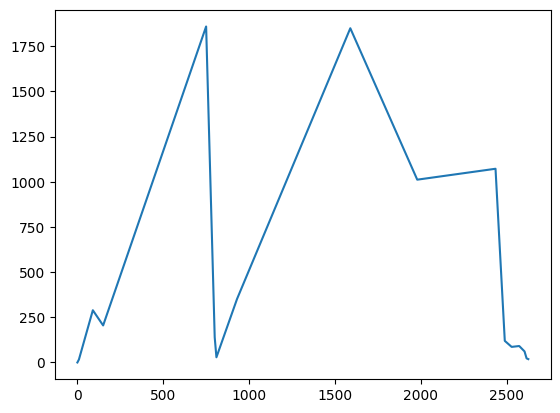

In [63]:
plt.plot(df_descarga['t soma'], df_descarga['E(J)'])
plt.show()

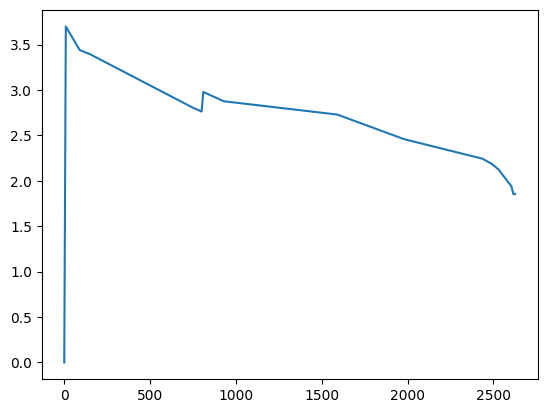

In [64]:
plt.plot(df_descarga['t soma'], df_descarga['P(w)'])
plt.show()

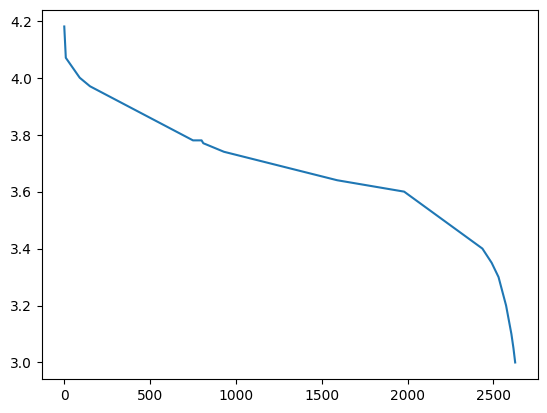

In [65]:
plt.plot(df_descarga['t soma'], df_descarga['V(V)'])
plt.show()

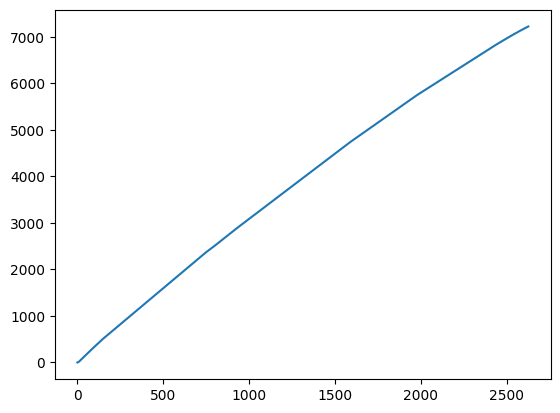

In [66]:
# Soma das energias
plt.plot(df_descarga['t soma'], df_descarga['Soma_Energias'])
plt.show()

In [67]:
total_capacity_descarga_with_nominal_voltage_sem_chave = ((df_descarga['E(J)'].sum() / 3600) / 3.7) * (10**3)
total_capacity_descarga_with_nominal_voltage_sem_chave

542.2989902402402

In [68]:
total_capacity_descarga = []
for i in range(0, len(list(df_descarga['t soma']))):
    capacity = np.trapz(y=df_descarga['I(A)'][i:i+2]*1000, x=df_descarga['t soma'][i:i+2]/3600)
    total_capacity_descarga.append(capacity)

In [69]:
sum(total_capacity_descarga)

542.6608333333334

In [70]:
df_descarga['Capacity(mAh)'] = total_capacity_descarga

In [71]:
df_descarga.head()

,t min arred,t s,t soma,t min,I(A),V(V),P(w),E(J),Soma_Energias,Capacity(mAh)
0,0.0,0.0,0.0,0.00,0.000,4.18,0.00000,0.000000,0.000000,1.136250
1,0.0,9.0,9.0,0.15,0.909,4.07,3.69963,16.648335,16.648335,19.901250
2,1.0,30.0,90.0,1.50,0.860,4.00,3.44000,289.155015,305.803350,14.291667
3,2.0,30.0,150.0,2.50,0.855,3.97,3.39435,205.030500,510.833850,133.083333
4,12.0,30.0,750.0,12.50,0.742,3.78,2.80476,1859.733000,2370.566850,10.229167


In [72]:
estimated_nominal_voltage_descarga_sem_chave = ((df_descarga['E(J)'] / 3600).sum()) / (sum(total_capacity_descarga) * 1e-3)

In [73]:
estimated_nominal_voltage_descarga_sem_chave

3.697532861481414

In [74]:
df_descarga['E(J)'].sum()

7223.422549999999

In [75]:
(df_descarga['E(J)'].sum() / 3600) / 3.7

0.5422989902402402

In [76]:
df_descarga

,t min arred,t s,t soma,t min,I(A),V(V),P(w),E(J),Soma_Energias,Capacity(mAh)
0,0.0,0.0,0.0,0.00,0.000,4.18,0.00000,0.000000,0.000000,1.136250
1,0.0,9.0,9.0,0.15,0.909,4.07,3.69963,16.648335,16.648335,19.901250
2,1.0,30.0,90.0,1.50,0.860,4.00,3.44000,289.155015,305.803350,14.291667
3,2.0,30.0,150.0,2.50,0.855,3.97,3.39435,205.030500,510.833850,133.083333
4,12.0,30.0,750.0,12.50,0.742,3.78,2.80476,1859.733000,2370.566850,10.229167
5,13.0,20.0,800.0,13.33,0.731,3.78,2.76318,139.198500,2509.765350,2.112500
6,13.0,30.0,810.0,13.50,0.790,3.77,2.97830,28.707400,2538.472750,25.983333
7,15.0,30.0,930.0,15.50,0.769,3.74,2.87606,351.261600,2889.734350,139.241667
8,26.0,30.0,1590.0,26.50,0.750,3.64,2.73000,1849.999800,4739.734150,77.620833
9,33.0,0.0,1980.0,33.00,0.683,3.60,2.45880,1011.816000,5751.550150,85.056667


# Comparações entre os ensaios

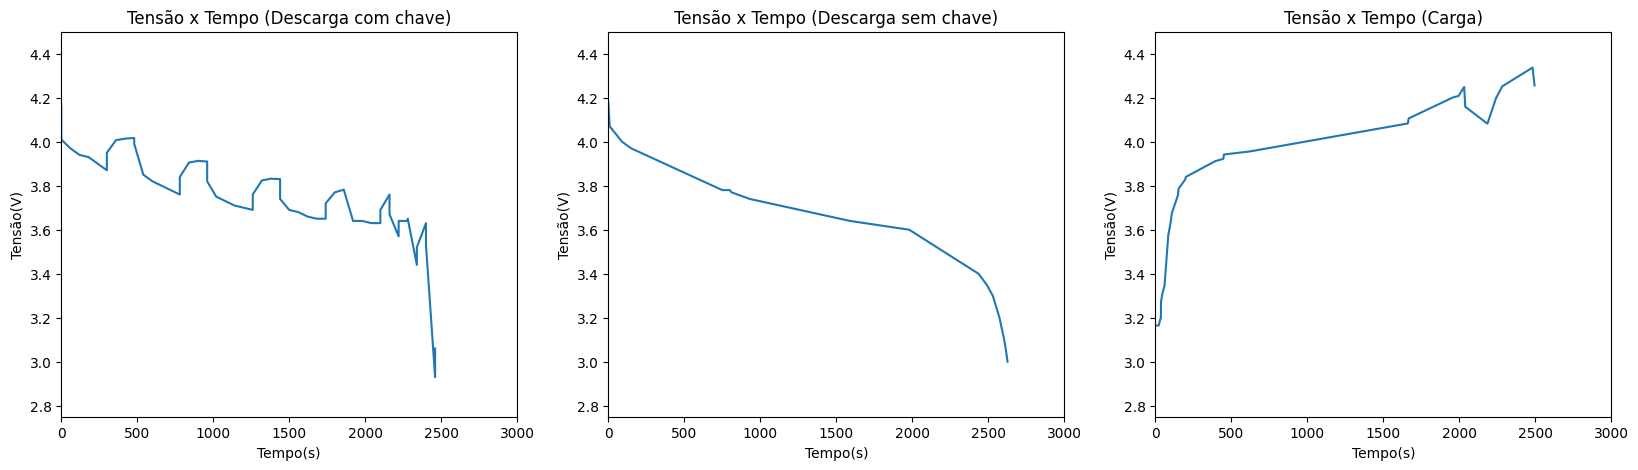

In [141]:
# Tensão
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['V(V)'])
plt.title('Tensão x Tempo (Descarga com chave)')
plt.ylabel('Tensão(V)')
plt.xlabel('Tempo(s)')
plt.xlim(0, 3000)
plt.ylim(2.75, 4.5)

plt.subplot(1, 3, 2)
plt.plot(df_descarga['t soma'], df_descarga['V(V)'])
plt.title('Tensão x Tempo (Descarga sem chave)')
plt.ylabel('Tensão(V)')
plt.xlabel('Tempo(s)')
plt.xlim(0, 3000)
plt.ylim(2.75, 4.5)

plt.subplot(1, 3, 3)
plt.plot(df_carga['t soma'], df_carga['V(V)'])
plt.title('Tensão x Tempo (Carga)')
plt.ylabel('Tensão(V)')
plt.xlabel('Tempo(s)')
plt.xlim(0, 3000)
plt.ylim(2.75, 4.5)


plt.show()



Text(0.5, 0, 'Tempo(s)')

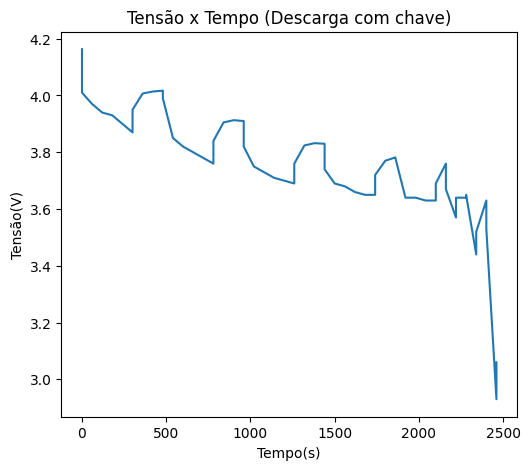

In [124]:
# Tensão
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['V(V)'])
plt.title('Tensão x Tempo (Descarga com chave)')
plt.ylabel('Tensão(V)')
plt.xlabel('Tempo(s)')

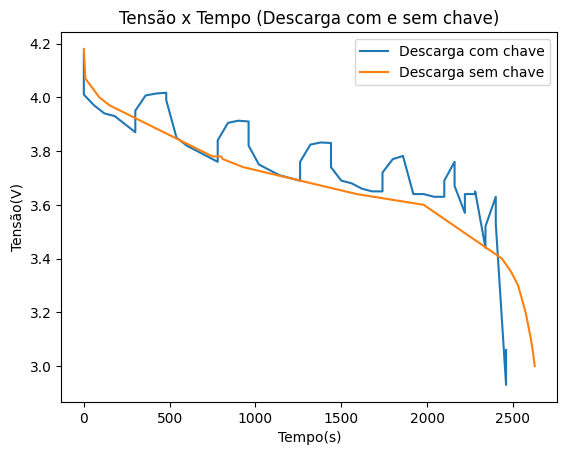

In [115]:
# Sobrepondo os gráficos de descarga com e sem chave
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['V(V)'])
plt.plot(df_descarga['t soma'], df_descarga['V(V)'])
plt.title('Tensão x Tempo (Descarga com e sem chave)')
plt.ylabel('Tensão(V)')
plt.xlabel('Tempo(s)')
plt.legend(['Descarga com chave', 'Descarga sem chave'])
plt.show()

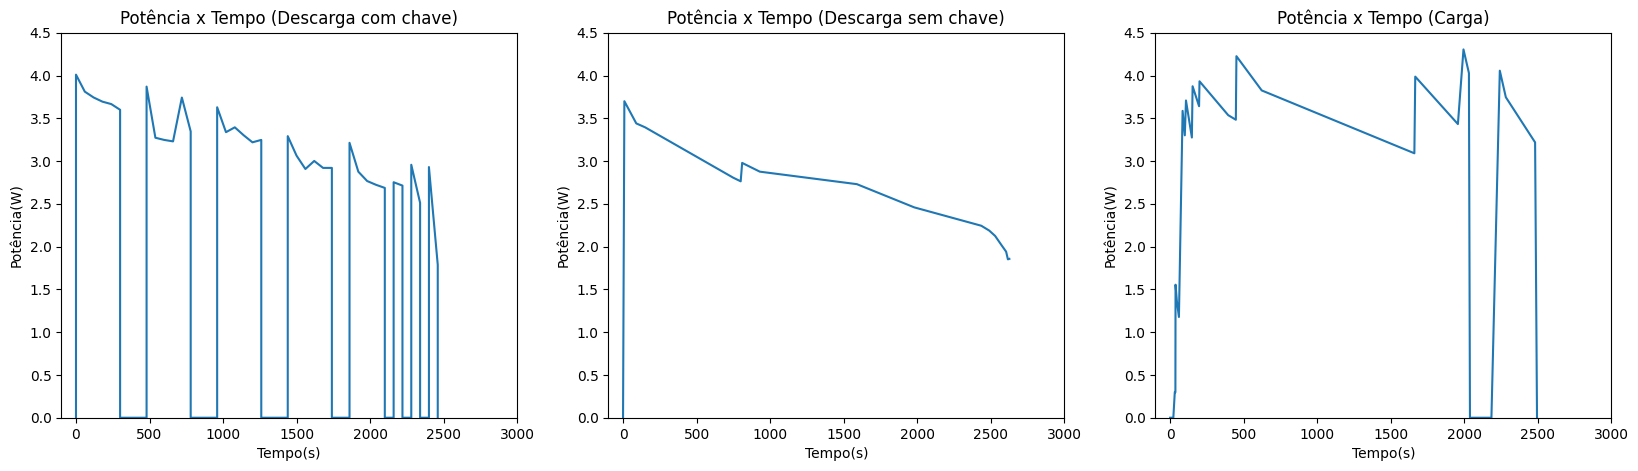

In [144]:
# Potência
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['Potência(W)'])
plt.title('Potência x Tempo (Descarga com chave)')
plt.ylabel('Potência(W)')
plt.xlabel('Tempo(s)')
plt.xlim(-100, 3000)
plt.ylim(0, 4.5)

plt.subplot(1, 3, 2)
plt.plot(df_descarga['t soma'], df_descarga['P(w)'])
plt.title('Potência x Tempo (Descarga sem chave)')
plt.ylabel('Potência(W)')
plt.xlabel('Tempo(s)')
plt.xlim(-100, 3000)
plt.ylim(0, 4.5)

plt.subplot(1, 3, 3)
plt.plot(df_carga['t soma'], df_carga['P(w)'])
plt.title('Potência x Tempo (Carga)')
plt.ylabel('Potência(W)')
plt.xlabel('Tempo(s)')
plt.xlim(-100, 3000)
plt.ylim(0, 4.5)


plt.show()

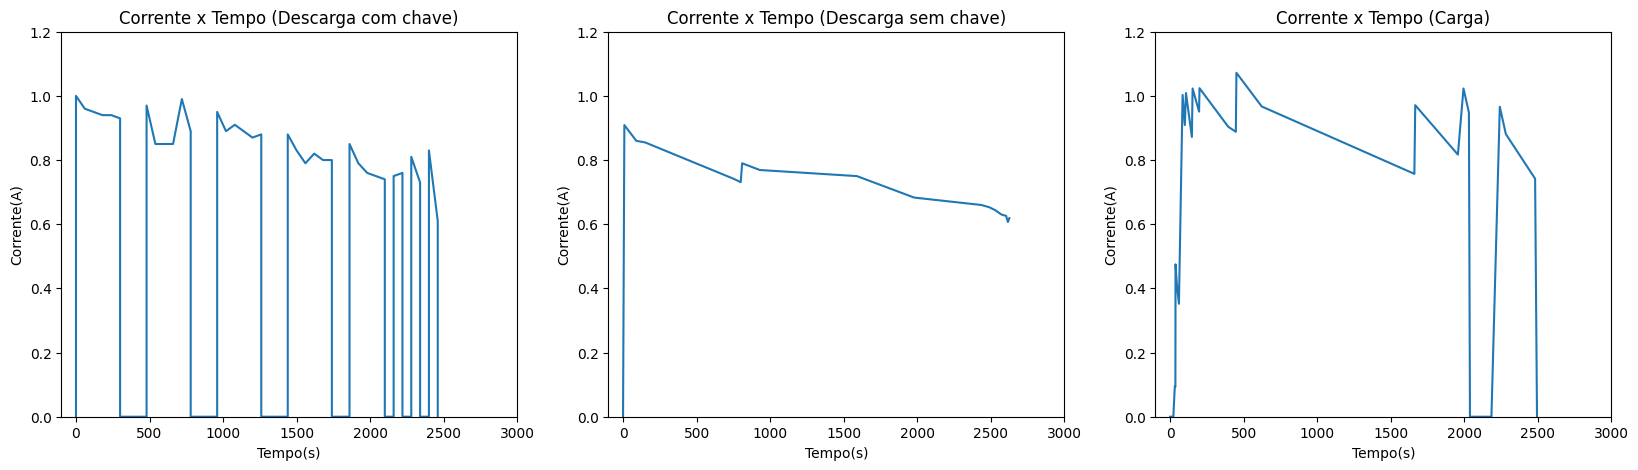

In [149]:
# Corrente
# Potência
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['I(A)'])
plt.title('Corrente x Tempo (Descarga com chave)')
plt.ylabel('Corrente(A)')
plt.xlabel('Tempo(s)')
plt.xlim(-100, 3000)
plt.ylim(0, 1.2)


plt.subplot(1, 3, 2)
plt.plot(df_descarga['t soma'], df_descarga['I(A)'])
plt.title('Corrente x Tempo (Descarga sem chave)')
plt.ylabel('Corrente(A)')
plt.xlabel('Tempo(s)')
plt.xlim(-100, 3000)
plt.ylim(0, 1.2)


plt.subplot(1, 3, 3)
plt.plot(df_carga['t soma'], df_carga['I(A)'])
plt.title('Corrente x Tempo (Carga)')
plt.ylabel('Corrente(A)')
plt.xlabel('Tempo(s)')
plt.xlim(-100, 3000)
plt.ylim(0, 1.2)



plt.show()

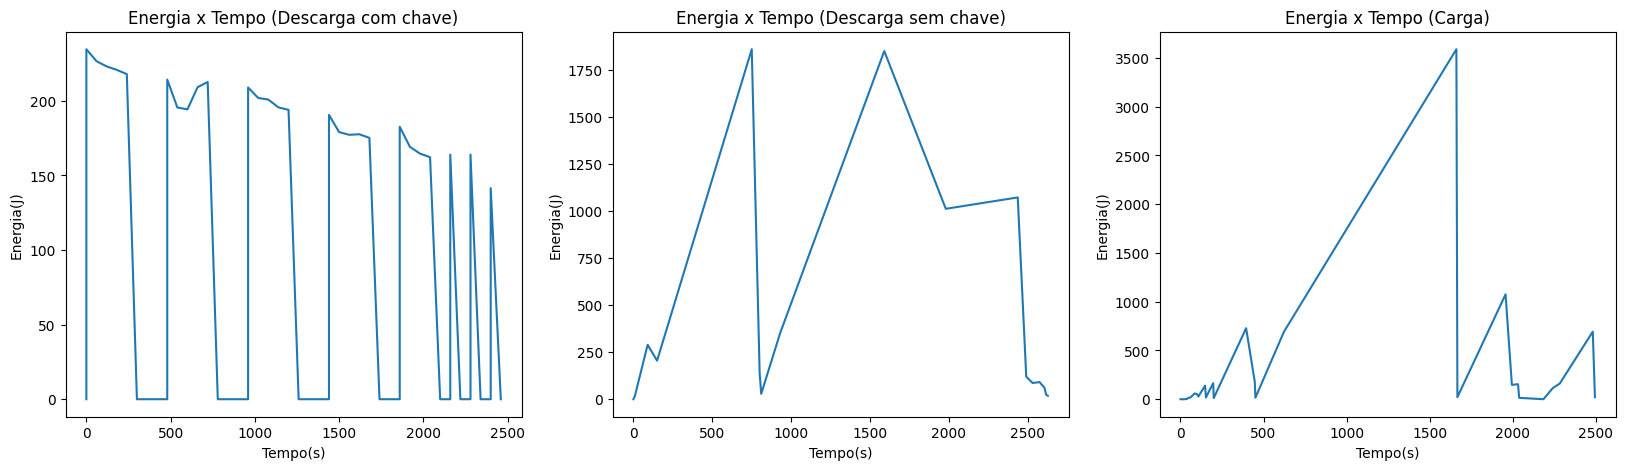

In [151]:
# Energia
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(df_descarga_chave['t_total'], df_descarga_chave['Energia(J)'])
plt.title('Energia x Tempo (Descarga com chave)')
plt.ylabel('Energia(J)')
plt.xlabel('Tempo(s)')

plt.subplot(1, 3, 2)
plt.plot(df_descarga['t soma'], df_descarga['E(J)'])
plt.title('Energia x Tempo (Descarga sem chave)')
plt.ylabel('Energia(J)')
plt.xlabel('Tempo(s)')

plt.subplot(1, 3, 3)
plt.plot(df_carga['t soma'], df_carga['E(J)'])
plt.title('Energia x Tempo (Carga)')
plt.ylabel('Energia(J)')
plt.xlabel('Tempo(s)')


plt.show()

In [127]:
df_descarga_chave[df_descarga_chave['description'].isin(['Descarga', 'Regeneração'])]

,V(V),I(A),t_total,description,Potência(W),Energia(J),Soma_Energias
2,3.970,0.96,60,Descarga,3.8112,226.626,461.262
3,3.940,0.95,120,Descarga,3.7430,223.116,684.378
4,3.930,0.94,180,Descarga,3.6942,220.806,905.184
5,3.900,0.94,240,Descarga,3.6660,217.953,1123.137
6,3.870,0.93,300,Descarga,3.5991,0.000,1123.137
8,4.007,0.00,360,Regeneração,0.0000,0.000,1123.137
9,4.014,0.00,420,Regeneração,0.0000,0.000,1123.137
10,4.017,0.00,480,Regeneração,0.0000,0.000,1123.137
12,3.850,0.85,540,Descarga,3.2725,195.585,1533.006
13,3.820,0.85,600,Descarga,3.2470,194.310,1727.316


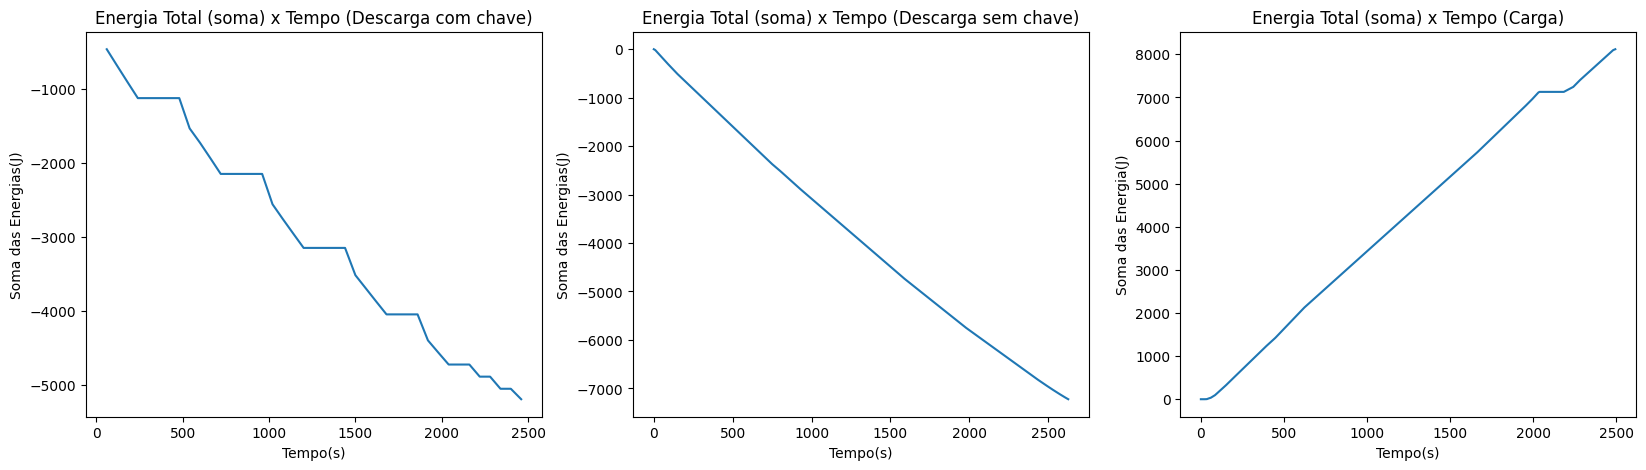

In [131]:
# Soma das energias
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(df_descarga_chave[df_descarga_chave['description'].isin(['Descarga', 'Regeneração'])]['t_total'], df_descarga_chave[df_descarga_chave['description'].isin(['Descarga', 'Regeneração'])]['Soma_Energias'] * -1)
plt.title('Energia Total (soma) x Tempo (Descarga com chave)')
plt.ylabel('Soma das Energias(J)')
plt.xlabel('Tempo(s)')

plt.subplot(1, 3, 2)
plt.plot(df_descarga['t soma'], df_descarga['Soma_Energias'] * -1)
plt.title('Energia Total (soma) x Tempo (Descarga sem chave)')
plt.ylabel('Soma das Energias(J)')
plt.xlabel('Tempo(s)')

plt.subplot(1, 3, 3)
plt.plot(df_carga['t soma'], df_carga['Soma_Energias'])
plt.title('Energia Total (soma) x Tempo (Carga)')
plt.ylabel('Soma das Energia(J)')
plt.xlabel('Tempo(s)')


plt.show()

In [82]:
# Energia Total nos 3 ensaios
energia_total_comparacao = {'Descarga com chave': [df_descarga_chave['Energia(J)'].sum()], 'Descarga sem chave': [df_descarga['E(J)'].sum()], 'Carga': [df_carga['E(J)'].sum()]}
energia_total_comparacao = pd.DataFrame(energia_total_comparacao)
energia_total_comparacao

,Descarga com chave,Descarga sem chave,Carga
0,5198.754,7223.42255,8117.773423


In [84]:
# Tensão nominal obtida nos três ensaios
tensao_nominal_comparacao = {'Descarga com chave': [estimated_nominal_voltage_descarga], 'Descarga sem chave': [estimated_nominal_voltage_descarga_sem_chave], 'Carga': [estimated_nominal_voltage_carga]}
tensao_nominal_comparacao = pd.DataFrame(tensao_nominal_comparacao)
tensao_nominal_comparacao

,Descarga com chave,Descarga sem chave,Carga
0,3.74766,3.697533,4.023348


In [85]:
# Capacidade obtida nos três ensaios
capacidade_comparacao = {'Descarga com chave': [total_capacity_with_nominal_voltage], 'Descarga sem chave': [total_capacity_descarga_with_nominal_voltage_sem_chave], 'Carga': [total_capacity_carga_with_nominal_voltage]}
capacidade_comparacao = pd.DataFrame(capacidade_comparacao)
capacidade_comparacao

,Descarga com chave,Descarga sem chave,Carga
0,390.296847,542.29899,609.442449


In [86]:
# Capacidade obtida nos três ensaios
capacidade_comparacao = {'Descarga com chave': [sum(total_capacity)], 'Descarga sem chave': [sum(total_capacity_descarga)], 'Carga': [sum(total_capacity_carga)]}
capacidade_comparacao = pd.DataFrame(capacidade_comparacao)
capacidade_comparacao

,Descarga com chave,Descarga sem chave,Carga
0,385.333333,542.660833,560.462875


### Cálculo da resistência interna

In [171]:
df_carga

,t soma,t min,I(A),V(V),P(w),E(J),Soma_Energias
0,0,0.000000,0.0000,3.164,0.000000,0.000000,0.000000
1,22,0.366667,0.0003,3.165,0.000950,0.010445,0.010445
2,32,0.533333,0.0944,3.193,0.301419,1.511843,1.522288
3,36,0.600000,0.0931,3.197,0.297641,1.198120,2.720408
4,37,0.616667,0.4750,3.273,1.554675,0.926158,3.646566
5,46,0.766667,0.4120,3.310,1.363720,13.132777,16.779343
6,60,1.000000,0.3520,3.345,1.177440,17.788120,34.567463
7,85,1.416667,1.0030,3.576,3.586728,59.552100,94.119563
8,100,1.666667,0.9090,3.631,3.300579,51.654803,145.774366
9,108,1.800000,1.0090,3.675,3.708075,28.034616,173.808982


In [172]:
df_descarga

,t min arred,t s,t soma,t min,I(A),V(V),P(w),E(J),Soma_Energias,Capacity(mAh)
0,0.0,0.0,0.0,0.00,0.000,4.18,0.00000,0.000000,0.000000,1.136250
1,0.0,9.0,9.0,0.15,0.909,4.07,3.69963,16.648335,16.648335,19.901250
2,1.0,30.0,90.0,1.50,0.860,4.00,3.44000,289.155015,305.803350,14.291667
3,2.0,30.0,150.0,2.50,0.855,3.97,3.39435,205.030500,510.833850,133.083333
4,12.0,30.0,750.0,12.50,0.742,3.78,2.80476,1859.733000,2370.566850,10.229167
5,13.0,20.0,800.0,13.33,0.731,3.78,2.76318,139.198500,2509.765350,2.112500
6,13.0,30.0,810.0,13.50,0.790,3.77,2.97830,28.707400,2538.472750,25.983333
7,15.0,30.0,930.0,15.50,0.769,3.74,2.87606,351.261600,2889.734350,139.241667
8,26.0,30.0,1590.0,26.50,0.750,3.64,2.73000,1849.999800,4739.734150,77.620833
9,33.0,0.0,1980.0,33.00,0.683,3.60,2.45880,1011.816000,5751.550150,85.056667


In [185]:
df_current_quadrado_descarga = pd.DataFrame([df_descarga['I(A)']**2]).T
df_current_quadrado_descarga.columns = ['I(A)']
df_current_quadrado_descarga['t_total'] = df_descarga['t soma']
df_current_quadrado_descarga

,I(A),t_total
0,0.000000,0.0
1,0.826281,9.0
2,0.739600,90.0
3,0.731025,150.0
4,0.550564,750.0
5,0.534361,800.0
6,0.624100,810.0
7,0.591361,930.0
8,0.562500,1590.0
9,0.466489,1980.0


In [188]:
resistance_descarga = np.trapz(y=df_current_quadrado_descarga['I(A)'], x=df_current_quadrado_descarga['t_total'])
resistance_descarga

1467.1774249999999

In [189]:
df_current_quadrado_carga = pd.DataFrame([df_carga['I(A)']**2]).T
df_current_quadrado_carga.columns = ['I(A)']
df_current_quadrado_carga['t_total'] = df_carga['t soma']
df_current_quadrado_carga

,I(A),t_total
0,0.000000e+00,0
1,9.000000e-08,22
2,8.911360e-03,32
3,8.667610e-03,36
4,2.256250e-01,37
5,1.697440e-01,46
6,1.239040e-01,60
7,1.006009e+00,85
8,8.262810e-01,100
9,1.018081e+00,108


In [199]:
resistance_carga = np.trapz(y=df_current_quadrado_carga['I(A)'], x=df_current_quadrado_carga['t_total'])
resistance_carga

1821.690522985

In [200]:
r = (df_carga['E(J)'].sum() - df_descarga['E(J)'].sum()) / (resistance_carga + resistance_descarga)
r

0.27193274001710704

In [201]:
# Reistência interna nos três ensaios
resistencia_interna_comparacao = {'Descarga com chave': [internal_resistance_chave], 'Carga e Descarga (assumindo serem iguais)': [r]}
resistencia_interna_comparacao = pd.DataFrame(resistencia_interna_comparacao)
resistencia_interna_comparacao

# relacionar com a energia

,Descarga com chave,Carga e Descarga (assumindo serem iguais)
0,0.084504,0.271933
